In [99]:
import os
from github import Github
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [115]:
load_dotenv()
sns.set(rc={'figure.figsize':(20,10)})

In [138]:
# using an access token
g = Github(os.getenv("GITHUB_TOKEN"))

In [139]:
# repositories = g.search_repositories(query='Cloudify+size:"> 1000"')

# Get all repositories mentioning Cloudify
repositories = g.search_repositories(query='Cloudify')

print("Found {} repositories".format(repositories.totalCount))

Found 805 repositories


In [140]:
for repo in repositories:
    if repo.description is not None and "Cloudify" in repo.description:
        print(repo.description)

size_arr = []
for repo in repositories:
    if repo.size > 0:
        size_arr.append(repo.size)

numpy_size = np.array(size_arr)

Cloudify's manager related code
Cloudify's CLI
Cloudify OpenStack Plugin
Cloudify Resources for Cloudify Plugins
Application and service recipes for Cloudify
Documentation website for Cloudify Platform
Cloudify Examples
Cloudify Resource Creation Configuration
vIMS Clearwater deployment and lifecycle management with Cloudify Orchestrator
The Golang implements for Cloudify VPN.
A sample Cloudify 3 application consisted of a nodejs server and mongodb database. 
Cloudify DSL Parser
Cloudify Templates for Cloudify Plugins
Cloudify's Agent module
Cloudify's New UI Framework
Cloudify System Tests
Cloudify plugin for packaging Kubernetes microservices in Cloudify blueprints.
A Cloudify Plugin that provisions resources in Amazon Web Services
Cloudify REST Client
This is where you can find officially supported Cloudify blueprints that work with the latest versions of Cloudify. Please make sure to use the blueprints from this repo when you are evaluating Cloudify. 
Cloudify vSphere Plugin
vCloud

In [132]:
print("Repos size mean = ", np.mean(numpy_size))
print("Repos size median = ", np.median(numpy_size))
print("Biggest repo size is = ", np.max(numpy_size))

Repos size mean =  5721.850267379679
Repos size median =  128.5
Biggest repo size is =  595997


<AxesSubplot:>

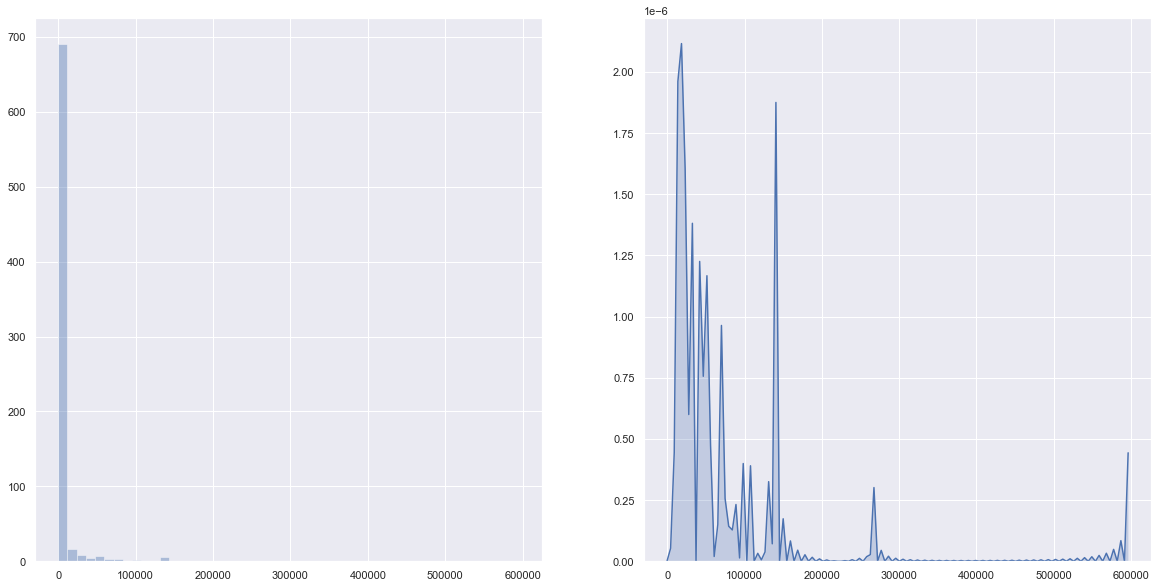

In [119]:
# plt.hist(arr, color = 'blue', edgecolor = 'black',
#          bins = 30)
fig, ax =plt.subplots(1,2)
sns.distplot(numpy_size, kde=False, ax=ax[0])
sns.kdeplot(numpy_size, shade=True, ax=ax[1])

